<a href="https://colab.research.google.com/github/PROACT-team/PROACT/blob/main/4_Kaplan_meier_estimation_on_each_target(Q3-2%EC%A0%90%2C%20full%20time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install lifelines

     |████████████████████████████████| 348 kB 14.2 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=70dcf28dcb5adae5920f3e4657646b45ff5eb75c48b7eae6810e8a9b1e4cb92c
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [3]:
from google.colab import files 
uploaded = files.upload()

Saving opt-target.csv to opt-target.csv
Saving real-target.csv to real-target.csv


In [4]:
import io
opt_target = pd.read_csv(io.BytesIO(uploaded['opt-target.csv'])) 
real_target = pd.read_csv(io.BytesIO(uploaded['real-target.csv'])) 

In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

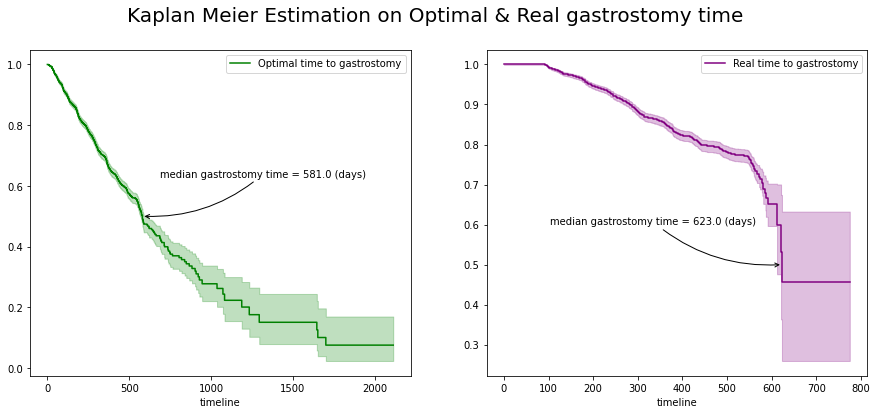

In [6]:
plt.figure(figsize=(15, 6))


plt.subplot(121)
OPT = kmf.fit(opt_target["time_opt"], opt_target["status_opt"], label='Optimal time to gastrostomy')
ax_kmf = OPT.plot(color='green')
plt.annotate("median gastrostomy time = "+str(OPT.median_survival_time_)+" (days)", xy=(float(OPT.median_survival_time_), 0.5)
                , xytext=(float(OPT.median_survival_time_)+110, 0.63), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))

plt.subplot(122)
REAL = kmf.fit(real_target['time_real'], real_target['status_real'], label='Real time to gastrostomy')
ax_kmf2 = REAL.plot(color='purple')
plt.annotate("median gastrostomy time = "+str(REAL.median_survival_time_)+" (days)", xy=(float(REAL.median_survival_time_), 0.5)
                , xytext=(float(REAL.median_survival_time_)-520, 0.6), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))

plt.suptitle('Kaplan Meier Estimation on Optimal & Real gastrostomy time', fontsize=20)
plt.show()